In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.stats import multivariate_normal

# Theorem 3.3 and Coordinate transformation

I don't know the diffence between theorem 3.3 and Coordinate transformation.   
So!   
I'm going to check How theorem 3.3 work and How coordinate transformation work.   
Then I want to understand thier behaviors definitely.

## PROCESS
1. Make 1000 datasets which follow multivariate_Gaussian_distribution([3,3],  [[5,6],[4,6]]) (data1)
2. Make the other datas with Theorem 3.3 (data2)
3. Make the other datas by changing the basis of data1 (data3)
4. Plot these datas on the same axis

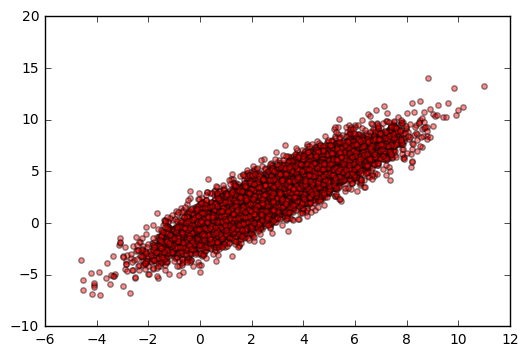

In [95]:
x, y = np.random.multivariate_normal([3,3],  [[5,6],[4,6]], 10000).T
X = np.dstack((x,y)).reshape((10000,2))
la, v = np.linalg.eig([[5,6],[4,6]])
mu = np.array([np.mean(x),np.mean(y)])
B = np.linalg.cholesky([[5,6],[4,6]])
plt.scatter(x,y,s=15,c='red',label="samle",alpha=0.45)

[[ 0.84858377  0.40271593]
 [ 0.40271593  0.69755755]]


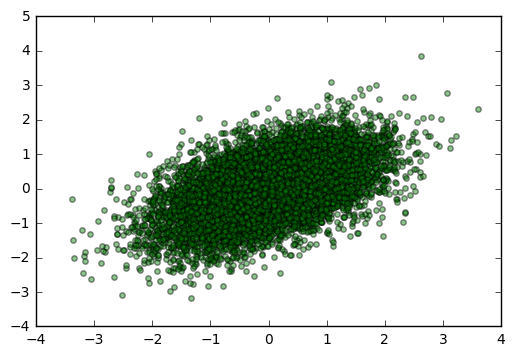

In [96]:
# 定理を用いてZ~N(0,I)と変換
Z1 = []
Z2 = []
for i in xrange(len(x)):
    z = np.dot(np.linalg.inv(B),(X-mu)[i])
    Z1.append(z[0])
    Z2.append(z[1])
plt.scatter(Z1,Z2,s=15,c='green',label="gaussian_c",alpha=0.45)
print np.cov(np.c_[np.array(Z1),np.array(Z2)],rowvar=0)

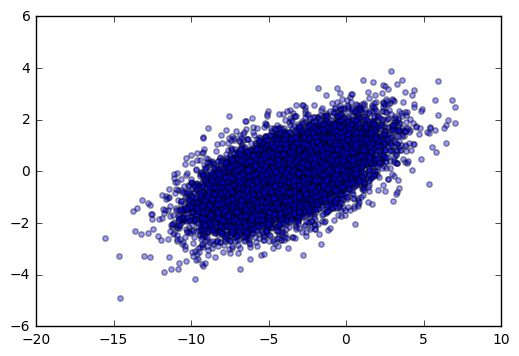

In [97]:
# 固有ベクトルを基底として座標変換
new_basis_x = []
new_basis_y = []
for i in xrange(len(x)):
    z = np.dot(np.linalg.inv(v.T),X[i].T)
    new_basis_x.append(z[0])
    new_basis_y.append(z[1])
plt.scatter(new_basis_x,new_basis_y,s=15,label="basis_c",alpha=0.4)

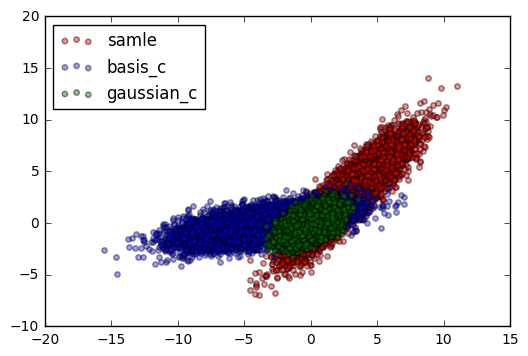

In [98]:
plt.scatter(x,y,s=15,c='red',label="samle",alpha=0.45)
plt.scatter(new_basis_x,new_basis_y,s=15,label="basis_c",alpha=0.4)
plt.scatter(Z1,Z2,s=15,c='green',label="gaussian_c",alpha=0.45)
plt.legend(loc=2)

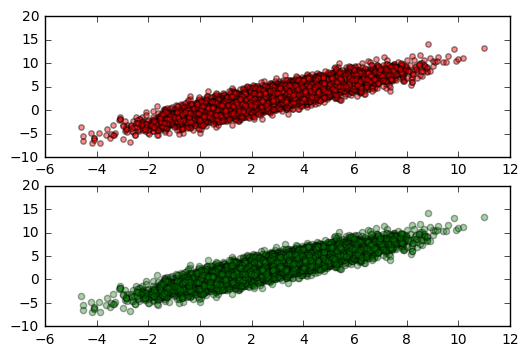

In [99]:
#共分散行列の固有ベクトルが貼る空間へ射影
V = v.T
proj_x = []
proj_y = []
for i in xrange(len(x)):
    proj = np.dot(np.dot(np.dot(V,np.linalg.inv(np.dot(V.T,V))),V.T),X[i].T)
    proj_x.append(proj[0])
    proj_y.append(proj[1])
plt.subplot(211)
plt.scatter(x,y,s=15,c='red',label="before",alpha=0.45)
plt.subplot(212)
plt.scatter(proj_x,proj_y,label="proj",alpha=0.35,c="green")